What this notebook does:

Exploratory data analysis of topic specific sentiments. For each review, the compound Vader sentiment of each sentence was assigned to a topic based on LDA topic importance (see './LDA_5topic_SentimentAssignment/EngineeringFeatures_basedon_5LDAnountopics.ipynb').  The sentiments associated with each topic in the review were averaged separately from one another. 

Distribution of these topic-specific sentiments, across all reviews are visualized.  Topic specific sentiment is also plotted against topic importance.  For topics of low importance, there is much variation in the associated sentiment. As topic importance increases, there is generally increasing sentiment for all topics except the 'Lines' topic.


In [1]:
#Step one directory up to access the yelp scraping function in the helper_functions module
import os
print(os.getcwd())
os.chdir('../')
os.getcwd()

/Users/thomasyoung/Dropbox/TYInsightProject/LDA_5Topic_VisualizationandGraphs


'/Users/thomasyoung/Dropbox/TYInsightProject'

In [2]:
#General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [3]:

reviews = pd.read_csv('./ProcessedData/reviews_withlda5topicfeatures.csv')
print(reviews.columns)
shops = pd.read_csv('./ProcessedData/coffeeshops_withcfcutoff.csv')

#add length of review as a feature
reviews['len'] = [len(wordlist) for wordlist in reviews.mreviewtxt.str.split().to_list()]

topiclabels = pd.read_csv('./LDAresults/lda5topic_labels.csv',header=None)
topiclabels = topiclabels[topiclabels.columns[0]].to_list()


Index(['id', 'name', 'alias', 'is_closed', 'review_count', 'price', 'rating',
       'transactions', 'latitude', 'longitude', 'geometry', 'index_right',
       'boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'catlist', 'numcoffeemen', 'numreviews',
       'fraccof', 'name_top5count', 'reviewidx', 'shopidx', 'date',
       'revrating', 'reviewtxt', 'mreviewtxt', 'review_lem_noun',
       'review_lem_nounverb', 'review_lem_nounadj', 'reviewtxt_periodonly',
       'review_lem_withperiod', 'vadersentiment_sentavg', 't0s', 't1s', 't2s',
       't3s', 't4s', 't0', 't1', 't2', 't3', 't4', 'vadersentiment'],
      dtype='object')


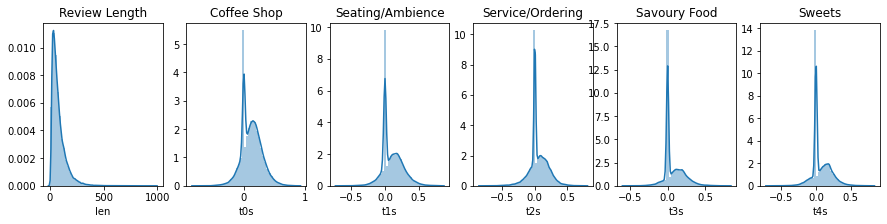

In [4]:
#How is the sentiment in reviews distributed
fig, ax = plt.subplots(1,6,figsize=(15,3))


sns.distplot(reviews.len,ax=ax[0])
ax[0].set_title('Review Length')
for i in range(5):
    sns.distplot(reviews['t' + str(i) + 's'],ax=ax[1+i])
    ax[1+i].set_title(topiclabels[i])

The sentiment distributions are all shifted more towards the positive side than the negative side. There appears to be a single peak of review sentiments for each topic.

Below I look at how the sentiment associated with a topics in a review is related to the length of the review.  Longer reviews clearly show less variability in sentiment.

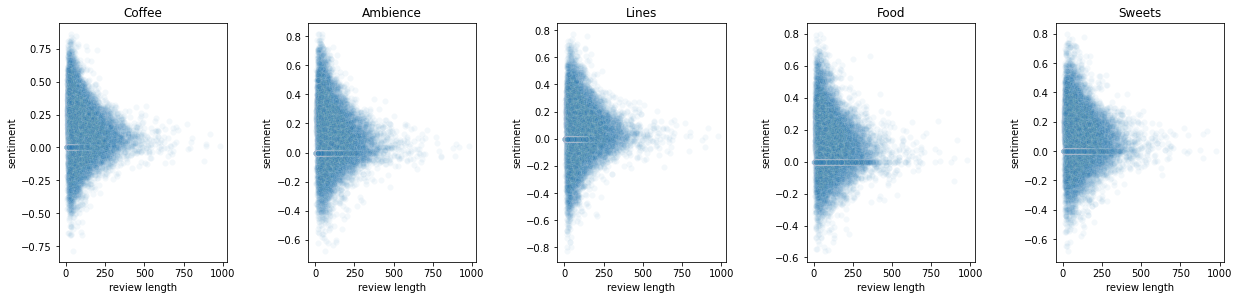

In [5]:
fig, ax = plt.subplots(1,5,figsize=(18,5))
fig.tight_layout(pad=5)

for i in range(5):
    sns.scatterplot(reviews.len,reviews['t' + str(i) + 's'],ax=ax[i],alpha=0.05)
    ax[i].set_xlabel('review length')
    ax[i].set_ylabel('sentiment')
    ax[i].set_title(topiclabels[i] )


It looks like the length of a review isn't really associated with any stronger sentiment for any of the topics individually.  Also the amount of a review related cot coffee drops off rapidly beyond about 300 words. There is a lot of variation in the coffee topic fraction for short reviews.

Topic sentiment is defined as the product of the topic importance and the review sentiment (vader, compound). Since review sentiment is constrained to be between 0 and 1, for a given topic importance, the most extreme topic sentiments are + or - that importance. Interestingly, for all topics, at low levels of importance there are similar levels of low and high sentiment.  At higher levels of topic importance, the sentiments tend to be more and moer postivie (except for the lines topic).

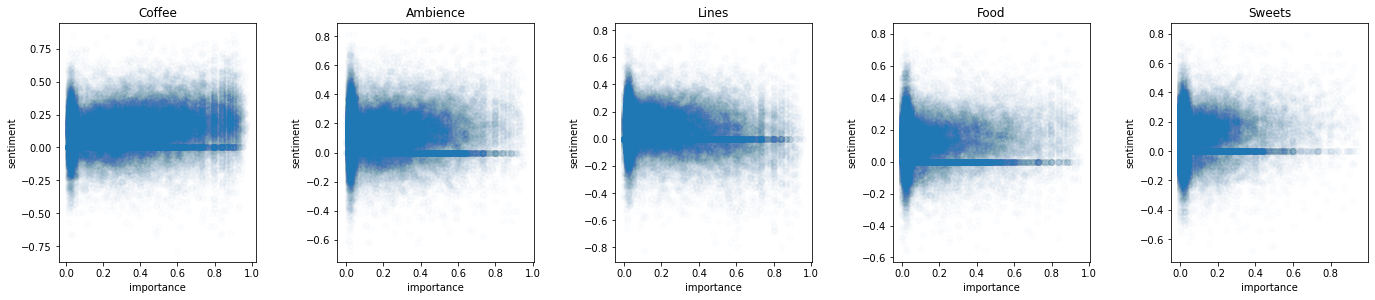

In [11]:
fig, ax = plt.subplots(1,5,figsize=(20,5))
fig.tight_layout(pad=5)

for i in range(5):
    ax[i].scatter(reviews['t' + str(i)],reviews['t' + str(i) + 's'],alpha=0.01)
    ax[i].set_xlabel('importance')
    ax[i].set_ylabel('sentiment')
    ax[i].set_title(topiclabels[i])

